### 학습목표
- 목적에 맞게 데이터를 준비하고 다듬는 방법을 알아보자~

In [1]:
import pandas as pd
import os # 파일관리시스템 -> operating system

In [2]:
# 현재 파일의 위치 확인 -> 절대경로
os.getcwd()

'C:\\Users\\smhrd\\LGDX_study\\2.LGDX_python_library'

In [3]:
# 현재 파일 기준 같은 폴더에 들어있는 파일 리스트
os.listdir()

['.ipynb_checkpoints',
 'data',
 'ex01_numpy.ipynb',
 'ex02_pandas 기초(생성 및 추출).ipynb',
 'ex03_pandas 활용(기술통계량 탐색).ipynb',
 'ex04_pandas활용(데이터 병합 및 정렬).ipynb']

In [4]:
# 특정 위치의 폴더에 들어있는 파일 리스트
os.listdir('./data/')

['.ipynb_checkpoints',
 'height_weight.txt',
 'hr-info.csv',
 'ratings.txt',
 '월별급여',
 '육군신체측정정보.csv']

In [5]:
# 파일 3개 불러오기
pd.read_csv('./data/월별급여/hr-pay-info-4월.csv', encoding = 'euc-kr')
pd.read_csv('./data/월별급여/hr-pay-info-5월.csv', encoding = 'euc-kr')
pd.read_csv('./data/월별급여/hr-pay-info-6월.csv', encoding = 'euc-kr')
# 일일이 불러오는 번거로운 작업 -> 반복문과 os 라이브러리를 활용하여 불러오자!

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791
2,E00164,20240601,월급,758
3,E00190,20240601,월급,708
4,E00209,20240601,월급,716
...,...,...,...,...
146,E00322,20240601,월급,375
147,E00389,20240601,월급,375
148,E00438,20240601,월급,375
149,E00304,20240601,월급,375


In [6]:
os.listdir('./data/월별급여/')

['hr-pay-info-4월.csv', 'hr-pay-info-5월.csv', 'hr-pay-info-6월.csv']

In [7]:
# 반복문을 통하여 파일 읽어오기
file_name = os.listdir('./data/월별급여/')
pay_list = []
for fn in file_name:
    df = pd.read_csv('./data/월별급여/' + fn, encoding = 'euc-kr')
    pay_list.append(df)

In [8]:
'./data/월별급여/' + 'hr-pay-info-4월.csv'

'./data/월별급여/hr-pay-info-4월.csv'

In [9]:
display(pay_list)

[        EID  PAYMENT_DY PAYMENT_DVCD  PAYMENT_AMOUNT
 0    E00206    20240401           월급             850
 1    E00181    20240401           월급             791
 2    E00164    20240401           월급             758
 3    E00190    20240401           월급             708
 4    E00209    20240401           월급             716
 ..      ...         ...          ...             ...
 448  E00322    20240401          상여금             300
 449  E00389    20240401          상여금             300
 450  E00438    20240401          상여금             300
 451  E00304    20240401          상여금             300
 452  E00428    20240401          상여금             300
 
 [453 rows x 4 columns],
         EID  PAYMENT_DY PAYMENT_DVCD  PAYMENT_AMOUNT
 0    E00206    20240501           월급             850
 1    E00181    20240501           월급             791
 2    E00164    20240501           월급             758
 3    E00190    20240501           월급             708
 4    E00209    20240501           월급             716
 

### DataFrame 병합하기(합치기) -> concat
- pd.concat([df1, df2, df3,...,] axis = 0 or 1)
  - 축설정
  - axis = 0 : 행방향으로 병합 (위에서 아래 방향으로 병합)
  - axis = 1 : 열방향으로 병합 (왼쪽에서 오른쪽 방향으로 병합)
  - default값은 axis = 0

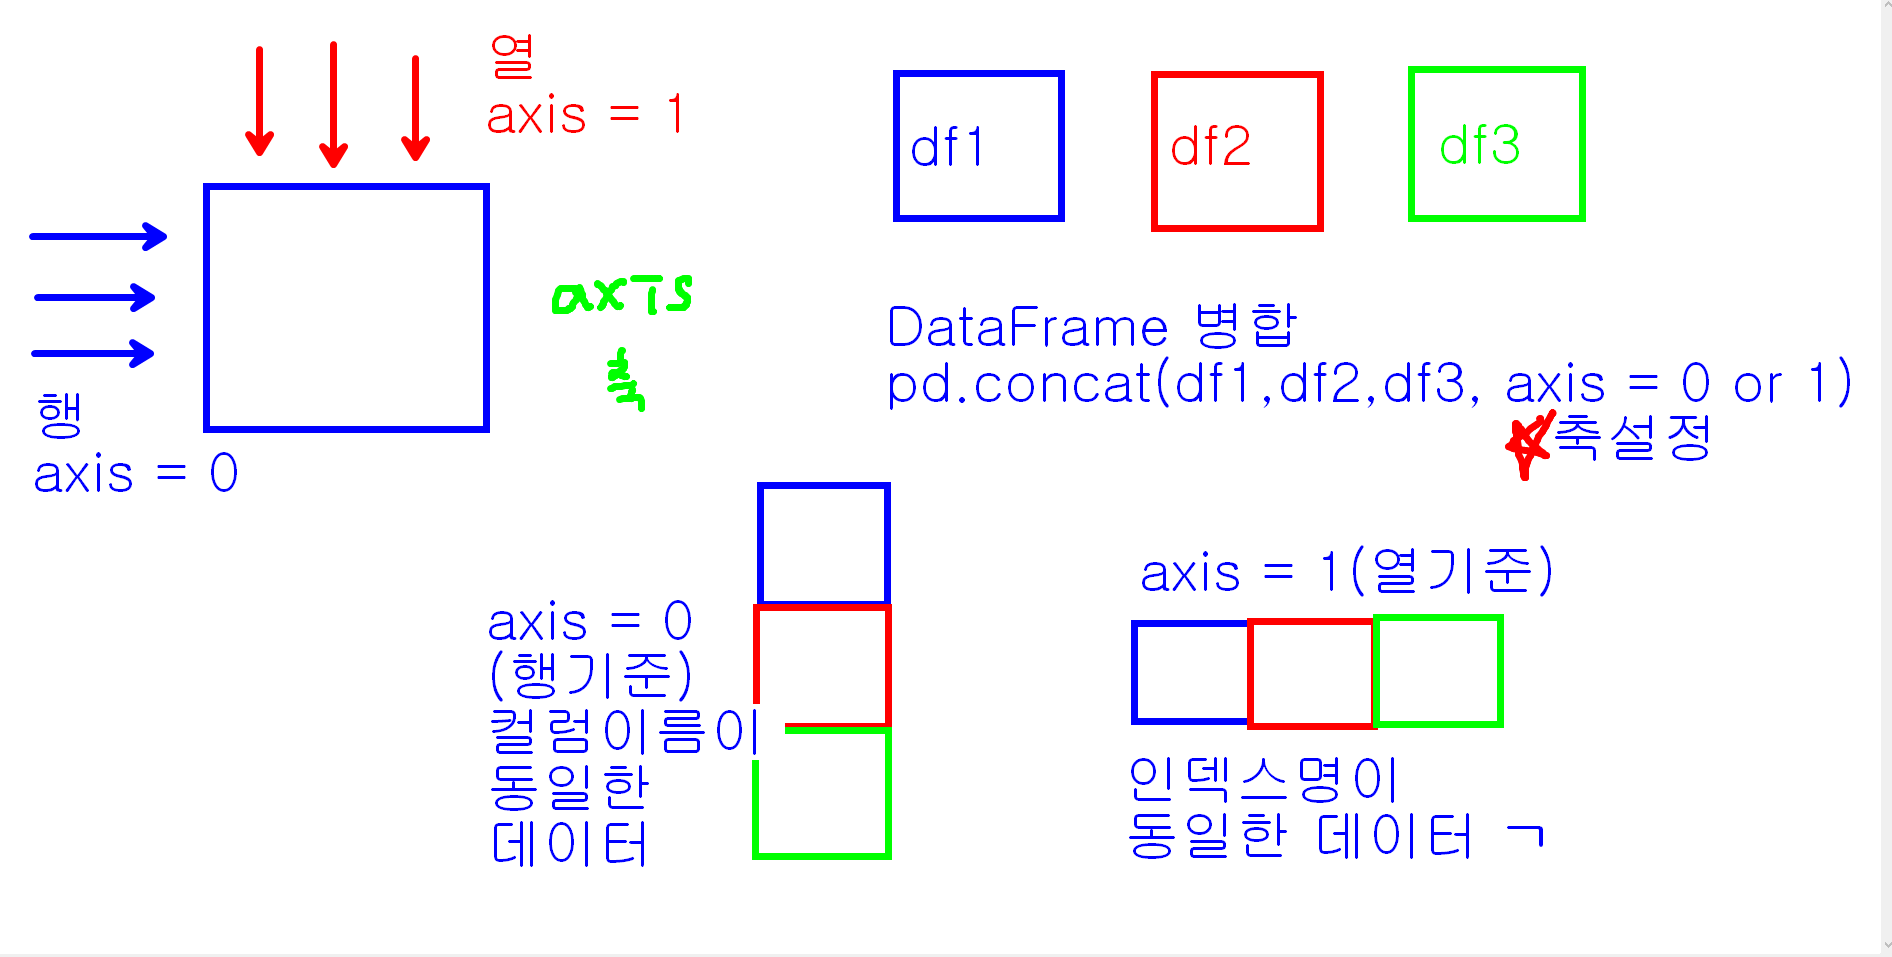

In [10]:
# 기본 축 설정은 axis = 0 행방향이다~
pd.concat(pay_list)

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240401,월급,850
1,E00181,20240401,월급,791
2,E00164,20240401,월급,758
3,E00190,20240401,월급,708
4,E00209,20240401,월급,716
...,...,...,...,...
146,E00322,20240601,월급,375
147,E00389,20240601,월급,375
148,E00438,20240601,월급,375
149,E00304,20240601,월급,375


In [11]:
pd.concat(pay_list,axis = 1)

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240401,월급,850,E00206,20240501.0,월급,850.0,E00206,20240601.0,월급,850.0
1,E00181,20240401,월급,791,E00181,20240501.0,월급,791.0,E00181,20240601.0,월급,791.0
2,E00164,20240401,월급,758,E00164,20240501.0,월급,758.0,E00164,20240601.0,월급,758.0
3,E00190,20240401,월급,708,E00190,20240501.0,월급,708.0,E00190,20240601.0,월급,708.0
4,E00209,20240401,월급,716,E00209,20240501.0,월급,716.0,E00209,20240601.0,월급,716.0
...,...,...,...,...,...,...,...,...,...,...,...,...
448,E00322,20240401,상여금,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,E00389,20240401,상여금,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,E00438,20240401,상여금,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,E00304,20240401,상여금,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# 행단위로 병합한 결과 -> csv 파일로 저장하기
total_df = pd.concat(pay_list, axis = 0)
#total_df.to_csv('저장할 경로/파일명.csv')
total_df.to_csv('./data/total_pay_info.csv', index = False)

In [34]:
hr_pay_info = pd.read_csv('./data/total_pay_info.csv')

- org_info.csv 파일을 읽어와 org_info 변수에 저장
  - 인코딩: 'euc-kr'
  - 'ORG_CD' 컬럼을 인덱스로 변경

In [18]:
org_info = pd.read_csv('./data/org-info.csv', encoding='euc-kr', index_col = 'ORG_CD')

In [19]:
org_info

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
ORG_CD,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.
ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.
ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.
ORG006,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Quality Assurance Team,webOS 품질 보증 팀,webOS 소프트웨어의 품질 검증 및 테스트를 수행합니다.
ORG007,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
ORG008,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Key Account Management Team,주요 고객 관리 팀,"주요 고객과의 관계를 관리하고, 맞춤형 솔루션을 제공합니다."
ORG009,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을..."


In [23]:
hr_info = pd.read_csv('./data/hr-info.csv', encoding = 'euc-kr')
hr_info.tail()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.0,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.0,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.0,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.0,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
199,E00428,을충나,F,ORG003,P009,24,0,학사 학위,0.0,4500,NaN,4,"Data Analysis, Python, Marketing",Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [26]:
# hr_info 데이터 프레임에서 'ORG_CD' 조직 코드에 따른 -> 인원수, 평균나이, 평균근속년수, 평균연봉 확인
# groupby()
org_agg = hr_info.groupby('ORG_CD').agg({'EID':'count',
                                          'AGE':'mean',
                                          'SERVICE_YEAR':'mean',
                                          'SALARY':'mean'})
# 컬럼이름 수치에 맞게 변경
org_agg.columns = ['HEAD_COUNT','AGE_MEAN','SERVICE_MEAN','SALARY_MEAN']
org_agg

,HEAD_COUNT,AGE_MEAN,SERVICE_MEAN,SALARY_MEAN
ORG_CD,,,,
ORG001,6,26.166667,0.333333,5033.333333
ORG002,4,34.000000,7.500000,6550.000000
ORG003,5,34.600000,7.600000,6480.000000
ORG004,11,35.181818,7.000000,6445.454545
ORG005,8,29.250000,2.000000,5525.000000
ORG006,6,30.833333,4.166667,5966.666667
ORG007,7,36.714286,8.000000,6728.571429
ORG008,5,32.400000,5.200000,6020.000000
ORG009,5,29.800000,2.200000,5520.000000


In [30]:
# org_info 데이터와 조직원 데이터에서 추출한 결과인 org_agg 병합
# concat 인덱스 번호가 같은 데이터끼리 병합 (열방향 병합) -> org_info_result
org_info_result = pd.concat([org_info, org_agg], axis = 1)

In [31]:
org_info_result

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,HEAD_COUNT,AGE_MEAN,SERVICE_MEAN,SALARY_MEAN
ORG_CD,,,,,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,6,26.166667,0.333333,5033.333333
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.000000,7.500000,6550.000000
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.,5,34.600000,7.600000,6480.000000
ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.,11,35.181818,7.000000,6445.454545
ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.,8,29.250000,2.000000,5525.000000
ORG006,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Quality Assurance Team,webOS 품질 보증 팀,webOS 소프트웨어의 품질 검증 및 테스트를 수행합니다.,6,30.833333,4.166667,5966.666667
ORG007,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다.",7,36.714286,8.000000,6728.571429
ORG008,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Key Account Management Team,주요 고객 관리 팀,"주요 고객과의 관계를 관리하고, 맞춤형 솔루션을 제공합니다.",5,32.400000,5.200000,6020.000000
ORG009,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을...",5,29.800000,2.200000,5520.000000


In [33]:
pd.concat([org_info, org_agg], axis = 0, join = 'inner')

""
ORG_CD
ORG001
ORG002
ORG003
ORG004
ORG005
ORG006
ORG007
ORG008
ORG009


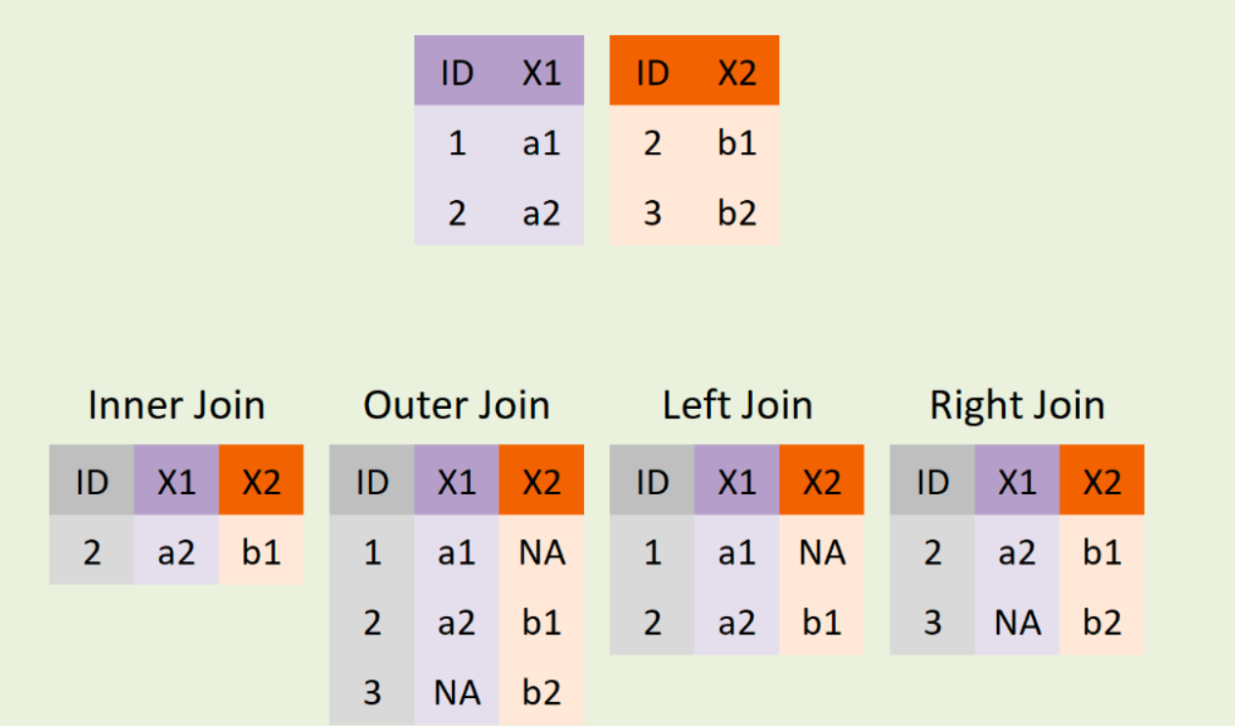

### DataFrame 병합 (합치기) - Merge
- 두개의 DataFrame 에서 공통된 키값을 기준으로 병합
- 데이터의 정보를 기준으로 병합 -> 두개의 DataFrame 에 공통으로 존재

- Merge 특징
  - Join 속성
    - inner: 교집합 병합 (기본)
    - outer: 합집합 병합
    - left: 왼쪽 데이터프레임 기준
    - right: 오른쪽 데이터프레임 기준

### Concat, Merge 차이점
- concat
  - 병합기준: 인덱스명, 컬럼명
  - 단순연결 (행추가, 열추가)
- merge
  - 병합기준: 데이터값 (공통된 키값)
  - 데이터셋 간의 관계를 바탕으로 결합

In [39]:
hr_pay_info.head()

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240401,월급,850
1,E00181,20240401,월급,791
2,E00164,20240401,월급,758
3,E00190,20240401,월급,708
4,E00209,20240401,월급,716


In [38]:
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


- hr_info, hr_pay_info 두개의 DataFrame 을 통해 직원별 급여내역 정리

In [44]:
# 직원정보(hr_info)에서 필요한 컬럼만 추출 후 병합
# EID, ENAME, GENDER
hr_info_df = hr_info[['EID','ENAME','GENDER']]
hr_info_df

,EID,ENAME,GENDER
0,E00206,시이오,M
1,E00181,나사장,F
2,E00164,난부사장,M
3,E00190,판라다,F
4,E00209,누훈봉,M
...,...,...,...
195,E00322,부탐회,F
196,E00389,초두반,F
197,E00438,권개득,M
198,E00304,탐출조,M


In [45]:
hr_info_df.shape

(200, 3)

In [47]:
# 병합 진행
# pd.merge(df1,df2, on = '병합 기준이 되는 키컬럼명', how = 'join 방식')
result_left = pd.merge(hr_info_df, hr_pay_info, on = 'EID', how = 'left')
result_left

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240401.0,월급,850.0
1,E00206,시이오,M,20240401.0,성과급,425.0
2,E00206,시이오,M,20240401.0,상여금,300.0
3,E00206,시이오,M,20240501.0,월급,850.0
4,E00206,시이오,M,20240601.0,월급,850.0
...,...,...,...,...,...,...
799,E00428,을충나,F,20240401.0,월급,375.0
800,E00428,을충나,F,20240401.0,성과급,188.0
801,E00428,을충나,F,20240401.0,상여금,300.0
802,E00428,을충나,F,20240501.0,월급,375.0


In [74]:
# 병합 오른쪽 DataFrame 을 기준으로 병합 -> result_right
result_right = pd.merge(hr_info_df, hr_pay_info, on = 'EID',how = 'right')
result_right

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240401,월급,850
1,E00181,나사장,F,20240401,월급,791
2,E00164,난부사장,M,20240401,월급,758
3,E00190,판라다,F,20240401,월급,708
4,E00209,누훈봉,M,20240401,월급,716
...,...,...,...,...,...,...
750,E00322,부탐회,F,20240601,월급,375
751,E00389,초두반,F,20240601,월급,375
752,E00438,권개득,M,20240601,월급,375
753,E00304,탐출조,M,20240601,월급,375


### 정리
- hr_info_df, hr_pay_info
- leftjoin: 조직 구성원 목록을 기준으로 병합, 급여정보가 없는 구성원도 포함
- rightjoin: 급여 지급데이터 기준으로 병합, 급여정보가 없는 구성원은 제외
- 조인방식은 분석 목적에 따라 다르게 선택
- 구성원전체를 유지 left, 급여내역중심의 정리 right

### 데이터 삭제
- df.drop('삭제하고자하는 인덱스명 or 컬럼명', axis = 0 or 1)
- 행삭제 -> 0, 열 삭제 -> 1

In [52]:
# drop 기본 축 -> 행기준 axis = 0
# 열 데이터를 삭제하기 위해서 axis = 1
hr_info.drop('NATION')

KeyError: "['NATION'] not found in axis"

In [53]:
hr_info.drop('NATION', axis = 1)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,N


In [54]:
# 데이터의 무분별한 삭제를 방지하기 위하여 다시한번 확인하는 속성 존재
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [55]:
# inplace 속성 -> 실행결과를 저장하는 속성
hr_info.drop('TRAINING_HOURS', axis = 1, inplace= True)

In [56]:
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


### apply
- DataFrame, Series 데이터에 함수를 행or열 단위로 적용할때 사용
- df.apply(함수명, 축설정) -> 기본축은 행 우선

In [57]:
# 년-월-일 로 구성되어있는 데이터에서 연도 데이터만 추출
date_list = [{'yyyy-mm-dd': '2003-03-13'},
            {'yyyy-mm-dd': '2017-10-20'},
            {'yyyy-mm-dd': '2022-05-28'}]
date_df = pd.DataFrame(date_list, columns=['yyyy-mm-dd'])
date_df

,yyyy-mm-dd
0,2003-03-13
1,2017-10-20
2,2022-05-28


In [58]:
data = '2003-03-13'
data

'2003-03-13'

In [60]:
# split('문자') 특정 기호를 중심으로 문자열을 분리 해주는 함수 -> 리스트형태
data.split('-')[0]

'2003'

In [63]:
# 사용자 정의함수 생성
def extract_year (data):
    return data.split('-')[0]

In [70]:
#DataFrame 에 함수 적용하기~~
# 바로 적용 X => apply 함수를 활용하여 가능
date_df['yyyy-mm-dd'].apply(extract_year)

0    2003
1    2017
2    2022
Name: yyyy-mm-dd, dtype: object

In [72]:
# date_df 에 'year' 컬럼을 추가하여 저장
date_df['year'] = date_df['yyyy-mm-dd'].apply(extract_year)
date_df

,yyyy-mm-dd,year
0,2003-03-13,2003
1,2017-10-20,2017
2,2022-05-28,2022


### apply 적용실습
- 내용: 직원의 성과점수'PERFORMANCE_SCORE'를 기준으로 성과등급'PERFORMANCE_GRADE' 컬럼을 새로 생성
- 조건
  - 사용자 정의함수 'get_grade' 정의하여 hr_info 에 적용 후 새로운 컬럼 추가
- 성과등급 기준
  | 성과 점수 | 성과 등급 |
|----------|----------|
| 4.5 이상 | S |
| 4.0 이상 | A |
| 3.0 이상 | B |
| 그 외 | C |


In [77]:
# 사용자 정의함수 생성 'get_grade'
# 점수에 따른 등급 부여 (조건문을 통하여 결과를 도출)
def get_grade (score):
    if score >= 4.5:
        return 'S'
    elif score >= 4.0:
        return 'A'
    elif score >= 3.0:
        return 'B'
    else:
        return 'C'

In [79]:
# apply 함수를 통하여 get_grade 함수 적용
hr_info['PERFORMANCE_SCORE'].apply(get_grade)

0      S
1      S
2      S
3      B
4      B
      ..
195    C
196    C
197    C
198    C
199    C
Name: PERFORMANCE_SCORE, Length: 200, dtype: object

In [80]:
# 결과를 hr_info 에 'PERFORMANCE_GRADE' 컬럼 추가
hr_info['PERFORMANCE_GRADE']=hr_info['PERFORMANCE_SCORE'].apply(get_grade)
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,PERFORMANCE_GRADE
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,S
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,S
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,S
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,B
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,C
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,C
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,C
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,C
